<a href="https://colab.research.google.com/github/derbymuchiri/AI-Coursework-2025/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Reading external data to google colab
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908.csv')

Saving Airplane_Crashes_and_Fatalities_Since_1908.csv to Airplane_Crashes_and_Fatalities_Since_1908 (1).csv


In [ ]:
#Importing necessary libraries
import pandas as pd #for arrays
import numpy as np #for series
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Determining the number of rows and columns in the dataset
rows,columns= df.shape
print(rows)
print(columns)

5268
13


In [ ]:
#Displaying the last 75 roes
df.tail(75)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


Date: If we don’t know when the crash happened, we discard the row.

Location: If the place is missing, “Unknown “is written. It’s better than leaving it blank.

Operator (Airline): If we don’t know which airline it was, we say “Unknown Operator”, like saying “someone” when you don’t remember their name.

Aboard / Fatalities / Ground: These are numbers; how many people were on the plane or died. If we’re missing some numbers, we use the middle number (median) because it’s fair.

Therefore, we write “No summary available” If the story part is empty


In [ ]:
#Creating a new dataframe
# Step 5
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()
fatality_locations.head()

,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0


In [ ]:
#Determining the date of the highest number of recorded falities
max_fatalities_row = fatality_locations.loc[fatality_locations['Fatalities'].idxmax()]
print("Date with the highest fatalities:", max_fatalities_row['Date'])


Date with the highest fatalities: 03/27/1977


In [ ]:
#comparing the number of passengers abroad to the number of fatalities per crash
fatality_locations['No_Fatalities'] = fatality_locations['Fatalities'] == 0
no_fatalities_count = fatality_locations['No_Fatalities'].sum()

print(f"There are {no_fatalities_count} recorded crashes with zero fatalities.")

There are 58 recorded crashes with zero fatalities.


In [ ]:
#question 8
fatality_locations[['Region', 'Country']] = fatality_locations['Location'].str.split(',', n=1, expand=True)
fatality_locations['Region'] = fatality_locations['Region'].str.strip()
fatality_locations['Country'] = fatality_locations['Country'].str.strip()

fatality_locations.head()

,Date,Location,Aboard,Fatalities,No_Fatalities,Region,Country
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0,False,Fort Myer,Virginia
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0,False,AtlantiCity,New Jersey
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0,False,Victoria,"British Columbia, Canada"
3,09/09/1913,Over the North Sea,20.0,14.0,False,Over the North Sea,None
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0,False,Near Johannisthal,Germany


In [ ]:
#ordering the dataframe by the number of fatalities from highest to lowest
top100 = fatality_locations.sort_values(by='Fatalities', ascending=False).head(100)
top100.head()


,Date,Location,Aboard,Fatalities,Region,State/Country
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0,Tenerife,Canary Islands
3568,08/12/1985,"Mt. Osutaka, near Ueno Village, Japan",524.0,520.0,Mt. Osutaka,"near Ueno Village, Japan"
4455,11/12/1996,"Near Charkhidadri, India",349.0,349.0,Near Charkhidadri,India
2726,03/03/1974,"Near Ermenonville, France",346.0,346.0,Near Ermenonville,France
3562,06/23/1985,"AtlantiOcean, 110 miles West of Ireland",329.0,329.0,AtlantiOcean,110 miles West of Ireland


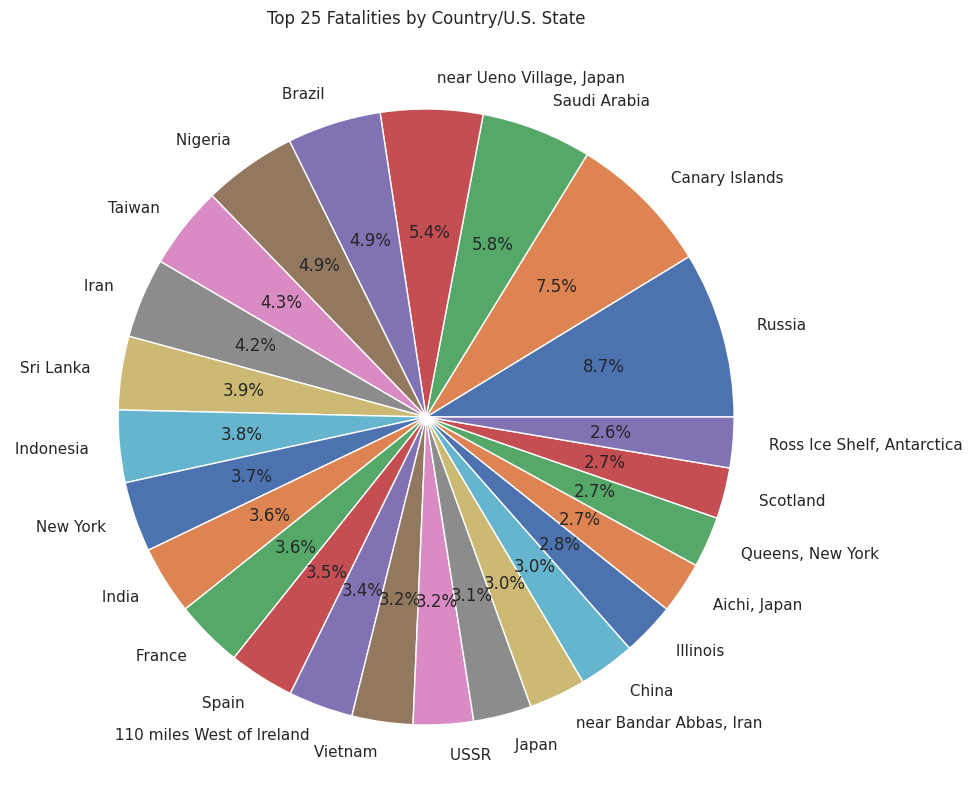

In [ ]:
#Generating a pie chat that shows the distribution of the top 25 fatalities
top25 = top100.groupby('State/Country')['Fatalities'].sum().sort_values(ascending=False).head(25)

plt.figure(figsize=(10,10))
top25.plot.pie(autopct='%1.1f%%')
plt.title('Top 25 Fatalities by Country/U.S. State')
plt.ylabel('')
plt.show()


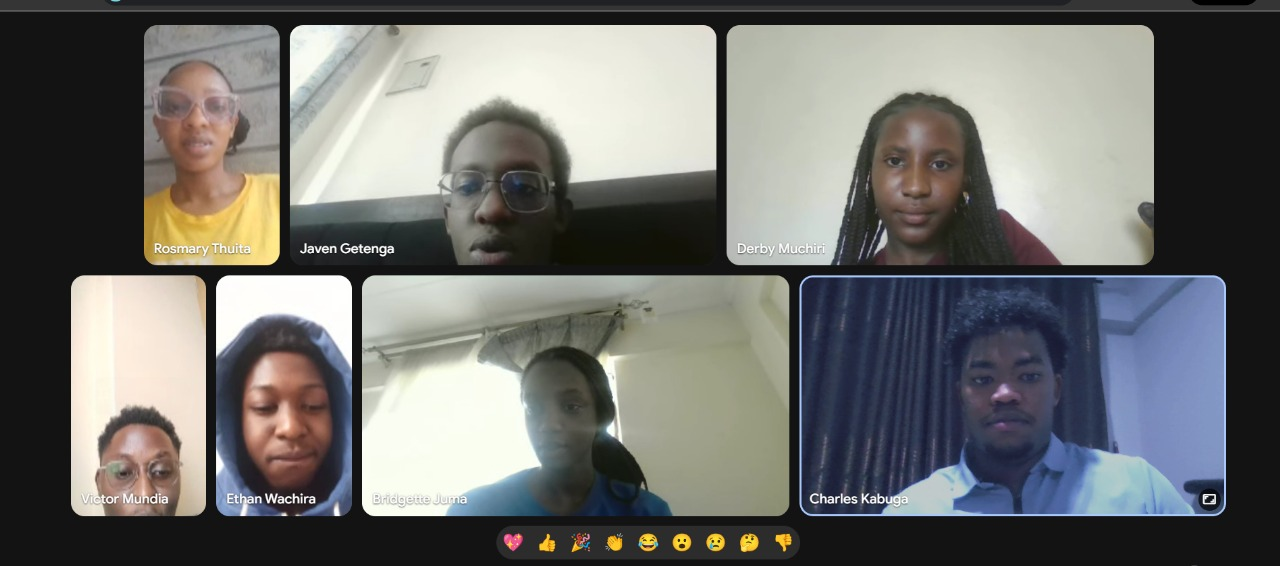